Importing useful Libraries


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
# from bartpy.sklearnmodel import SklearnModel as BARTModel
import seaborn as sns
import matplotlib.pyplot as plt


Loading the preprocessed data

In [18]:
data = pd.read_csv(r'C:\Users\Youss\satsoc\final.csv')  # Replace with your file path
print(data.columns)


Index(['location_id ', 'SOCc ', 'B01    ', 'B02    ', 'B03    ', 'B04    ',
       'B05    ', 'B06    ', 'B07    ', 'B8A    ', 'B08    ', 'B09    ',
       'B11    ', 'B12'],
      dtype='object')


Separate features and target & Split the dataset into training and validation sets (90/10 split)

In [26]:
X = data[[col for col in data.columns if col.startswith('B')]]
y = data['SOCc ']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


Creating and Fitting the models (Random Forest, XGBoost, BART)

In [30]:
# Create a model instance
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate the model
mse_rf = mean_squared_error(y_val, y_pred)
r2_rf = r2_score(y_val, y_pred)
mae_rf = mean_absolute_error(y_val, y_pred)

print(f'Mean Absolute Error:{mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R² Score: {r2_rf}')


Mean Absolute Error:0.3031333333333333
Mean Squared Error: 0.14409872666666662
R² Score: -0.14705454063018175


In [33]:
# Convert the dataset into DMatrix format, which XGBoost requires
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # for regression
    'eval_metric': 'rmse',
    'seed': 42
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = xgb_model.predict(dval)

# Evaluate the model
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R² Score: {r2_xgb}')


XGBoost Mean Absolute Error: 0.32421027501424154
XGBoost Mean Squared Error: 0.14011633440462978
XGBoost R² Score: -0.11535390570849557


In [35]:
# Comparison of model performances
print("Model Comparison:")
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R²: {r2_rf}\n')

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R²: {r2_xgb}\n')

# print(f'BART MSE: {mse_bart}')
# print(f'BART R²: {r2_bart}\n')


Model Comparison:
Random Forest MSE: 0.14409872666666662
Random Forest R²: -0.14705454063018175

XGBoost MSE: 0.14011633440462978
XGBoost R²: -0.11535390570849557



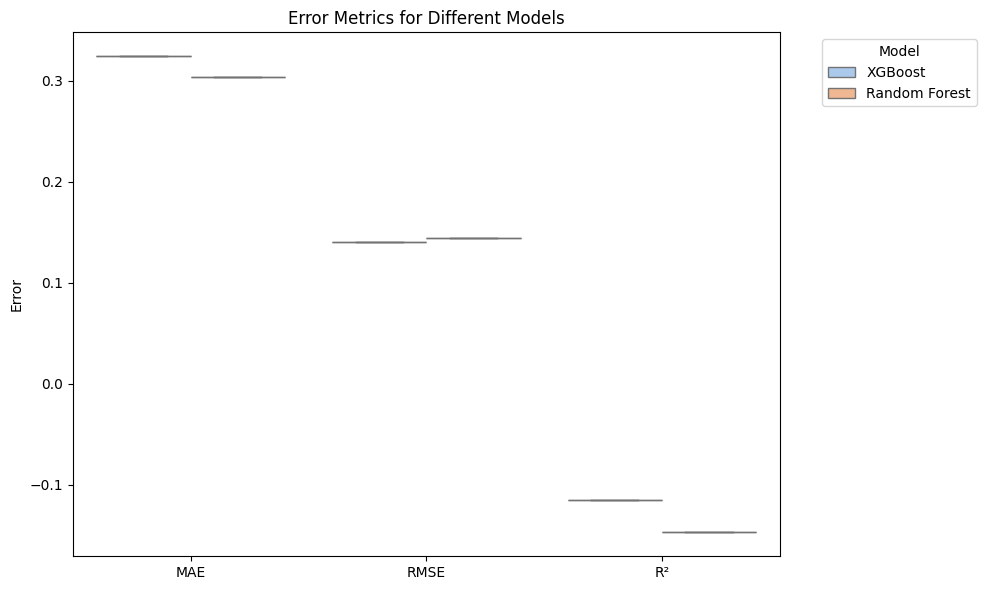

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Store errors for each model
data = {
    'Model': ['XGBoost', 'Random Forest'] * 3,
    'Metric': ['MAE'] * 2 + ['RMSE'] * 2 + ['R²'] * 2,
    'Value': [mae_xgb, mae_rf, mse_xgb,mse_rf, r2_xgb, r2_rf]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Value', hue='Model', data=df, palette='pastel')

# Add plot labels
plt.title('Error Metrics for Different Models')
plt.xlabel('')
plt.ylabel('Error')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


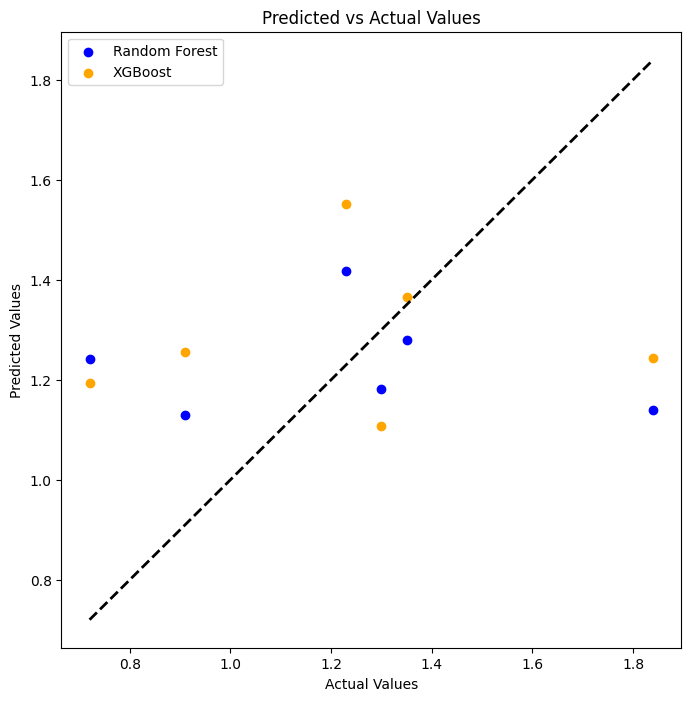

In [42]:
# Plot Prediction vs Actual
plt.figure(figsize=(8, 8))

# Plotting each model's predictions
plt.scatter(y_val, y_pred, color='blue', label='Random Forest')
plt.scatter(y_val, y_pred_xgb, color='orange', label='XGBoost')
# plt.scatter(y_val, y_pred_bart, color='green', label='BART')

# Plot the 45-degree line (perfect prediction line)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()
